<a href="https://www.kaggle.com/code/omarelsayed1/used-car-prediction-using-linear-regression?scriptVersionId=154763674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

My First Machine Learning Project: Predicting Used Car Prices!

I'm thrilled to announce that I've completed my first project in Machine Learning!

For my debut, I tackled the classic task of predicting used car prices. I explored a dataset of used cars and built a model using Linear Regression.

I drew valuable insights from the work of Kaggle user yogidsba: https://www.kaggle.com/code/yogidsba/predict-used-car-prices-linearregression

While my initial model achieved an accuracy of 85%, I'm aware that there's always room for improvement. Nevertheless, this project provided me with an invaluable learning experience and deepened my understanding of Machine Learning concepts.

I'm excited to continue exploring this field and delve into more complex algorithms and datasets. I'm also eager to learn from your thoughts and feedback. Please feel free to share your considerations and suggestions in the comments below!

 Data Set


1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Citiesr> 4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

Work contains:
Import Python Libraries,
Reading Dataset,
Data Reduction,
Feature Engineering,
Creating Features,
Data Cleaning/Wrangling,
EDA Exploratory Data Analysis,
Statistics Summary,
EDA Univariate Analysis,
Data Transformation,
EDA Bivariate Analysis,
Impute Missing values

In [1]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading our data
data = pd.read_csv('../input/cars4u/used_cars_data.csv')

In [3]:
# Let’s take a look at the top five rows using the DataFrame’s head() method
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
'''
The info() method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number of nonnull values
data.info()
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


There are 7,253 instances in the dataset, which means that it is fairly small
by Machine Learning standards, but it’s perfect to get started. Notice that ther are
lots of missing values in our data especially in columns ['New_Price','Price'] . 'S.No.' column will not be prefer . We will need to take care of this later.


In [5]:
my_data = data

In [6]:
my_data.drop("S.No.",axis = 1, inplace = True)

In [7]:
my_data.shape

(7253, 13)

In [8]:
my_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
my_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [10]:
# to know how many null values in our data
my_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [11]:
# how these null values represent as percentage for each column
my_data.isnull().sum() / my_data.shape[0] *100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [12]:
#to be able to deal wit most of our data we have to transform features which considered to be numeric to be it

In [13]:
my_data.Mileage = my_data.Mileage.str.split().str.get(0)
my_data.Mileage = my_data.Mileage.astype('float')
my_data.Engine = my_data.Engine.str.split().str.get(0)
my_data.Engine = my_data.Engine.astype('float')
my_data.Power = my_data.Power.str.split().str.get(0)
my_data['Power'] = pd.to_numeric(my_data['Power'], errors = 'coerce') # converts non-numbers to NaN

In [14]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [15]:
my_data['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

i think there are 2 types of currency in 'New_Price' which are (Lakh,Cr), The currency must be unified

In [16]:
import re
result = []
for value in my_data['New_Price']:
    if isinstance(value,str):

        if re.search(r"Lakh",value):
            result.append(float(value.replace("Lakh","")))
        elif re.search(r"Cr",value):
            result.append(float(value.replace("Cr",""))*100) # 1 Cr = 100 Lakh
        else:
            result.append(np.nan)
    else:
            result.append(np.nan)

my_data['New_Price'] = result

In [17]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [18]:
#its not possible to be values = 0 in Mileage "abnormal" need to be detected and turn them to nan values
my_data[my_data['Mileage'].isin([0])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,NaN
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,NaN
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,NaN


81 abnormal values must be changed null values

In [19]:
my_data.loc[my_data['Mileage']==0,'Mileage'] = np.nan

In [20]:
my_data[my_data['Seats'].isin([0])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,NaN,18.0


In [21]:
my_data.loc[my_data['Seats']==0,'Seats'] = np.nan

In [22]:
# "Name" contains the brand and model of the car , we will separate it
my_data['Brand'] = my_data['Name'].str.split().str.get(0)
my_data['Model'] = my_data['Name'].str.split().str.get(1) + my_data['Name'].str.split().str.get(2)

In [23]:
my_data['Brand'].value_counts(ascending=False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: count, dtype: int64

Maruti and Hyundai They seem the most preferable

In [24]:
my_data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [25]:
# ['Land','Isuzu', 'ISUZU','Mini] >> need to be corrected
my_data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [26]:
# we got 2 columns that represent target and one of them[new_price] represent the edition of prices in column(Price) ,
# so we can merge them together
my_data['Final_Price'] = my_data['New_Price'].where(~my_data['New_Price'].isna(),data['Price'])

In [27]:
my_data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,WagonR,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta1.6,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,JazzV,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4New,17.74


In [28]:
# lets dive in more details, to see which most of our best columns features are useed
features =['Location','Year','Fuel_Type','Transmission','Owner_Type','Engine','Seats','Brand','Model']
print(f"Top 10 popular values are almost used")
for i in features:
    print(f"\n*{i}*\n")
    print(my_data[i].value_counts(ascending=False).head(10))
    print("#"*50)

Top 10 popular values are almost used

*Location*

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: count, dtype: int64
##################################################

*Year*

Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
Name: count, dtype: int64
##################################################

*Fuel_Type*

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
##################################################

*Transmission*

Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
##################################################

*Owner_Type*

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

In [29]:
#Summary Statistics
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7170 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Brand              7253 non-null   object 
 14  Model              7252 non-null   object 
 15  Final_Price        6201 non-null   float64
dtypes: float64(7), int64(2),

In [30]:
numric_cols =my_data.select_dtypes(include=np.number).columns.to_list()
cat_cols =["Location","Fuel_Type","Transmission","Owner_Type","Brand"]
numric_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price',
 'Final_Price']

# Univariate Analysis

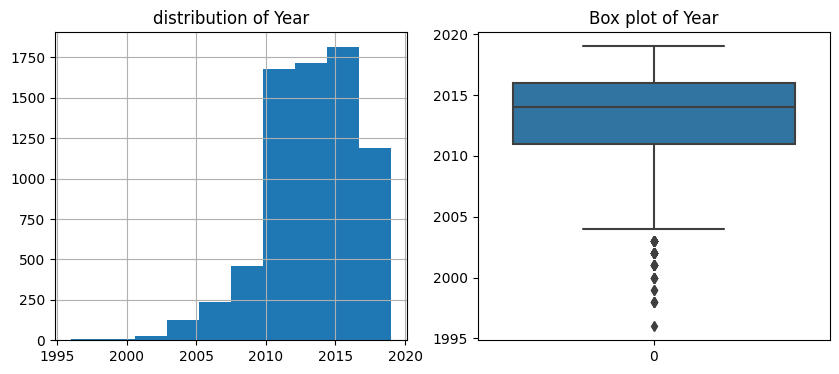

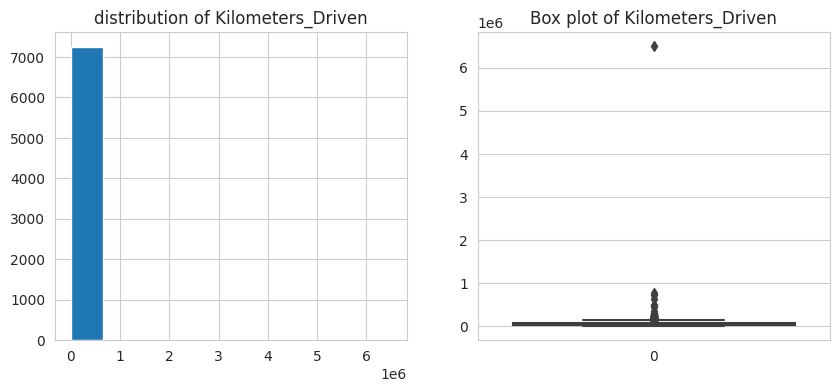

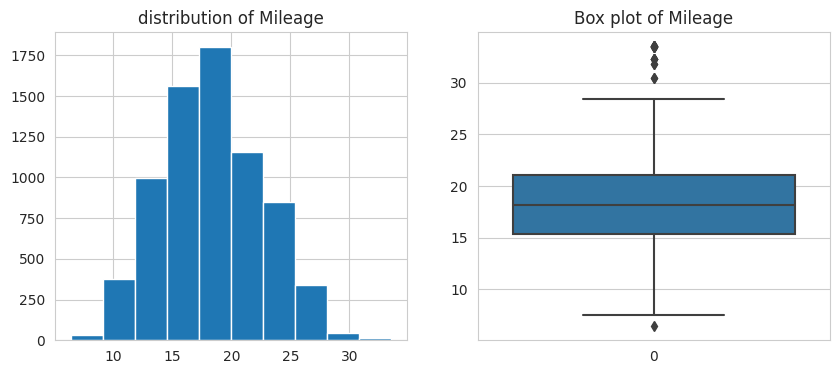

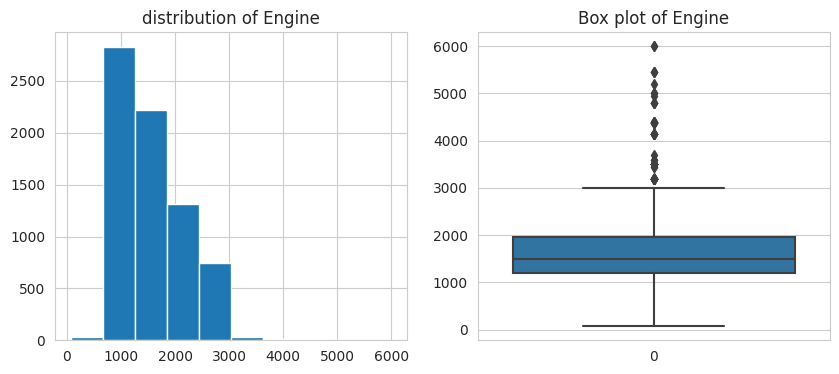

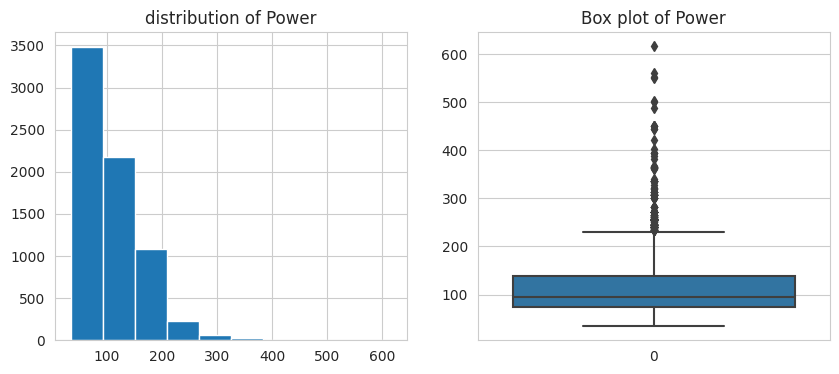

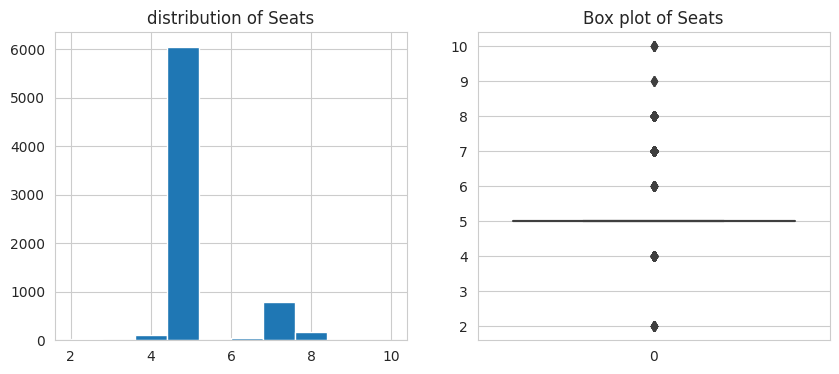

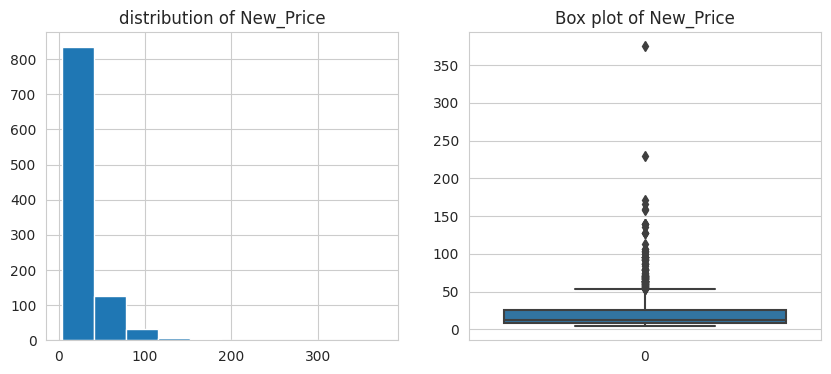

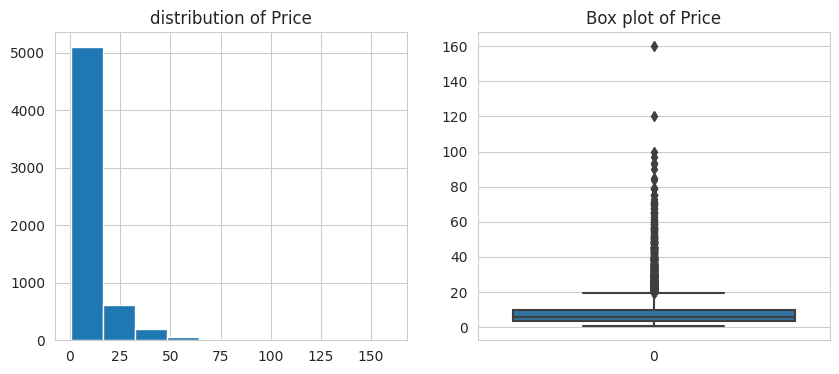

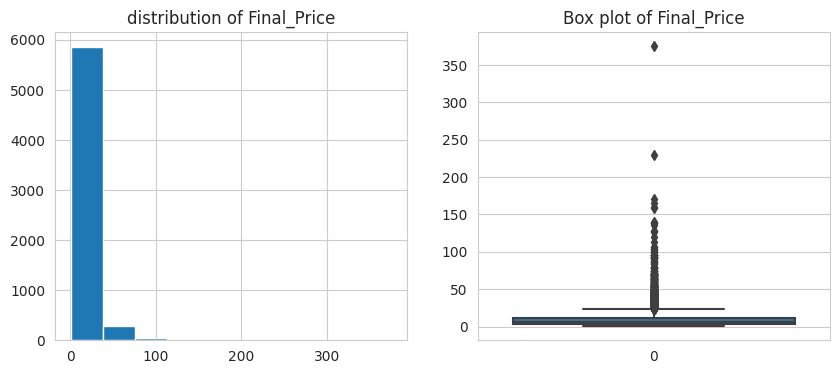

In [31]:
for column in numric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    my_data[column].hist(figsize=(10, 4))
    plt.title(f"distribution of {column}")

    plt.subplot(1,2,2)
    sns.set_style("whitegrid")
    sns.boxplot(my_data[column])
    plt.title(f"Box plot of {column}")





most of our data are right skewed especially in Kilometers_Driven, Final_Price, Price, New_Price,Power.
Year is left skewed
Mileage seems normal
Engine is little bit right skewed

In [32]:
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

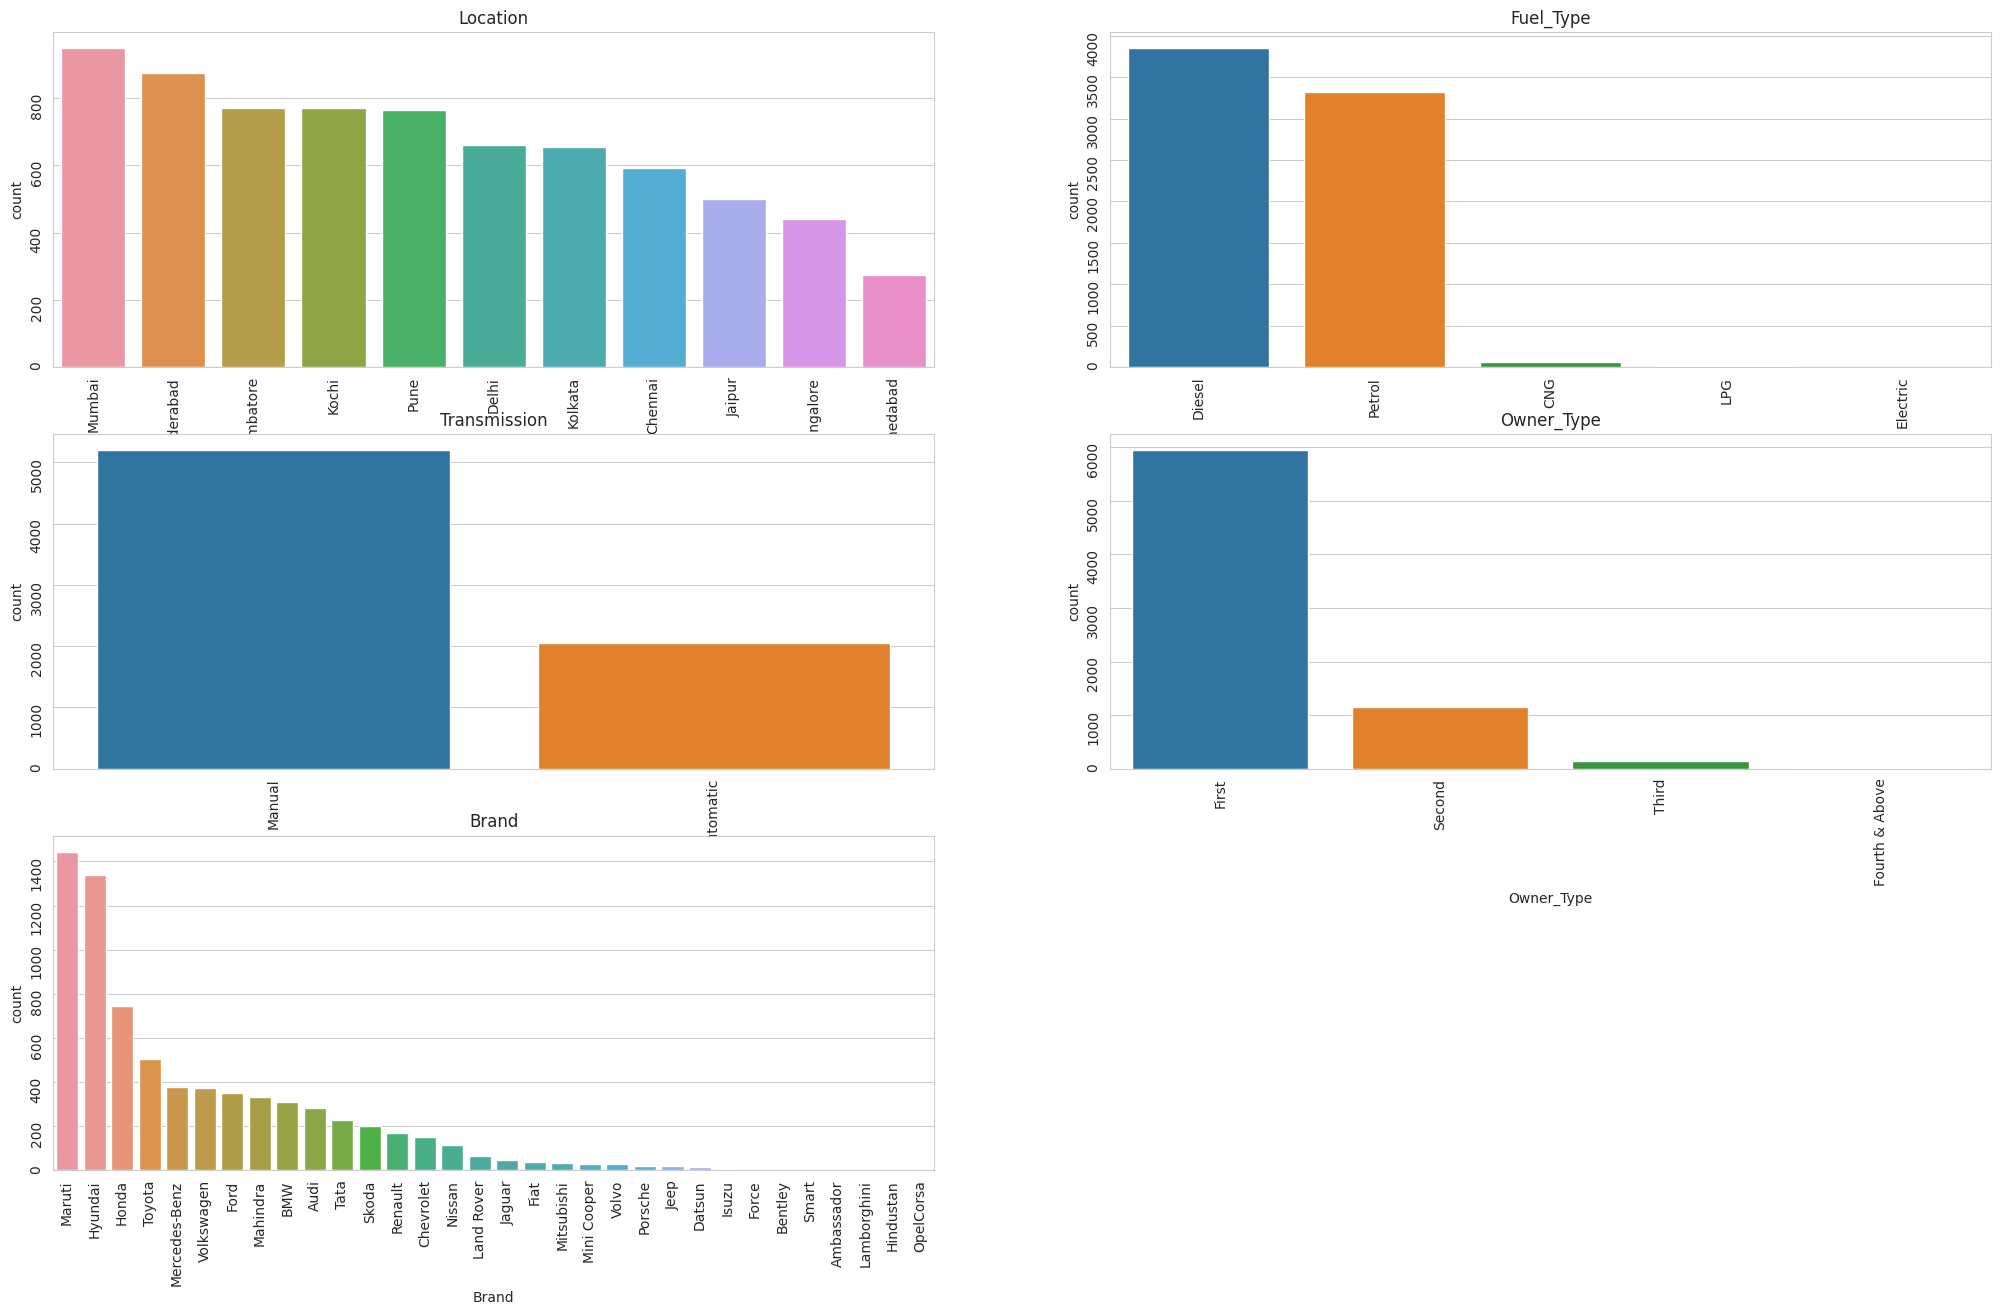

In [33]:
counter =1
plt.figure(figsize = (25,20))
for i in cat_cols:
    axes =plt.subplot(4,2,counter)
    top_10 =my_data[i].value_counts().index
    sns.countplot(x=my_data[i],data =my_data,order = top_10)
    plt.title(i)
    axes.tick_params(labelrotation=90)
    counter = counter +1

# lets see each value with Our target "Final_Price"

<Axes: xlabel='Kilometers_Driven', ylabel='Final_Price'>

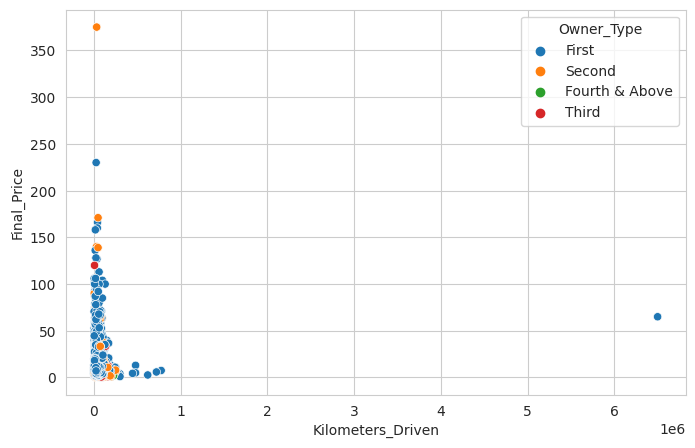

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=my_data['Kilometers_Driven'],y=my_data['Final_Price'],hue=my_data['Owner_Type'])

In [35]:
# we catched 2 points far of the distribtion of our data lets detect them

In [36]:
my_data.loc[my_data['Kilometers_Driven'] == 775000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3,1968.0,141.0,5.0,NaN,7.5,Skoda,OctaviaAmbition,7.5


In [37]:
my_data.loc[my_data['Final_Price'] >250]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.2,5998.0,616.0,5.0,375.0,NaN,Bentley,FlyingSpur,375.0


<Axes: xlabel='Power', ylabel='Final_Price'>

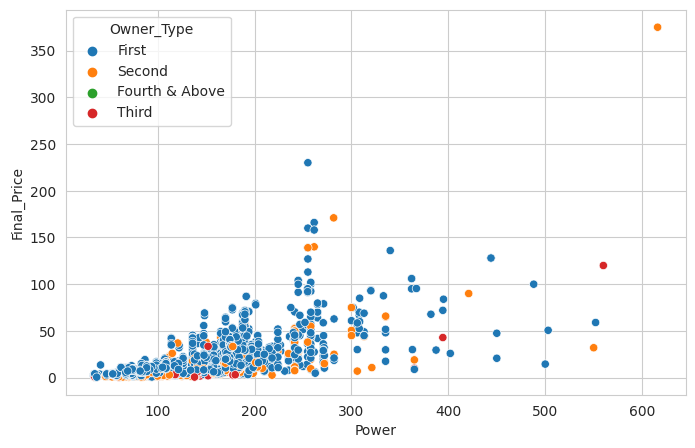

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=my_data['Power'],y =my_data['Final_Price'],hue=my_data['Owner_Type'])

In [39]:
my_data.loc[my_data['Power'] >600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.2,5998.0,616.0,5.0,375.0,NaN,Bentley,FlyingSpur,375.0


<Axes: xlabel='Year', ylabel='Final_Price'>

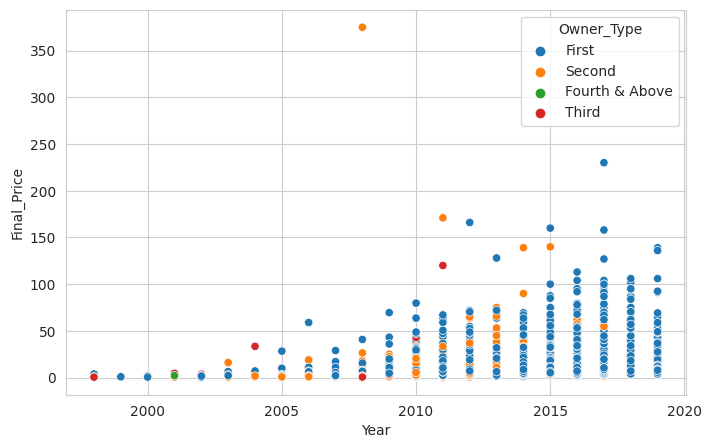

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=my_data['Year'],y=my_data['Final_Price'],hue=my_data['Owner_Type'])

<Axes: xlabel='Engine', ylabel='Final_Price'>

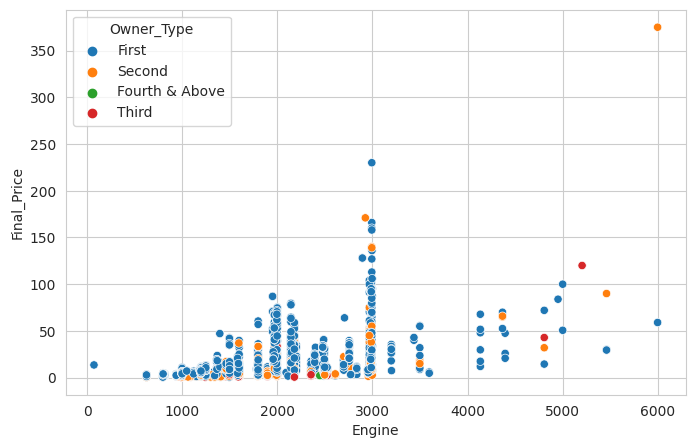

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=my_data['Engine'],y=my_data['Final_Price'],hue=my_data['Owner_Type'])

In [42]:
my_data.loc[my_data['Engine'] >5900]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6,5998.0,552.0,4.0,NaN,59.0,Bentley,ContinentalFlying,59.0
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.2,5998.0,616.0,5.0,375.0,NaN,Bentley,FlyingSpur,375.0


### as you see Bentley Flying Spur W12 and Skoda Octavia Ambition Plus 2.0 TDI AT seem outliear values ,that should be removed


In [43]:
my_data = my_data.drop(my_data[my_data['Name'] =='Skoda Octavia Ambition Plus 2.0 TDI AT'].index)
my_data = my_data.drop(my_data[my_data['Name'] == 'Bentley Flying Spur W12'].index)

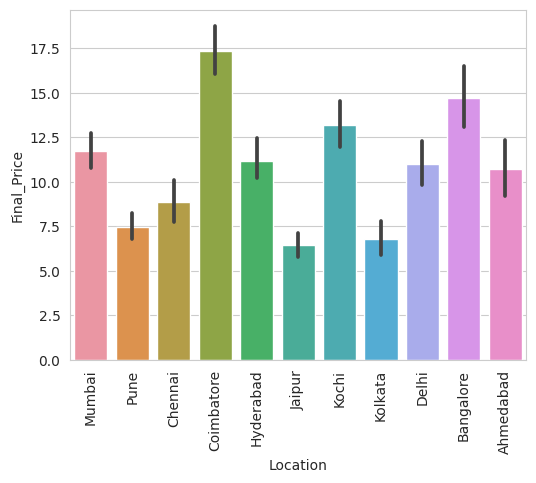

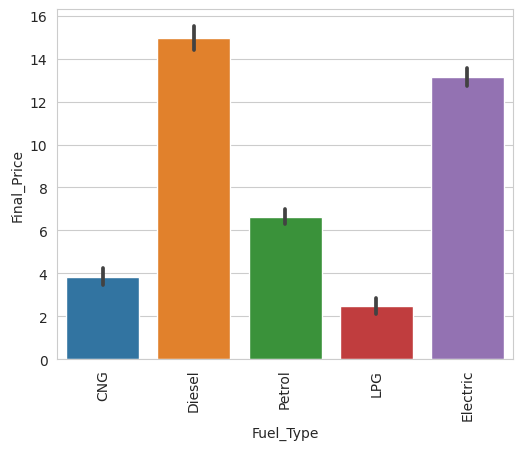

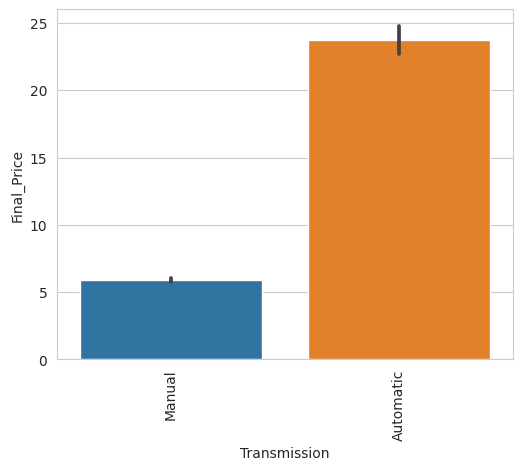

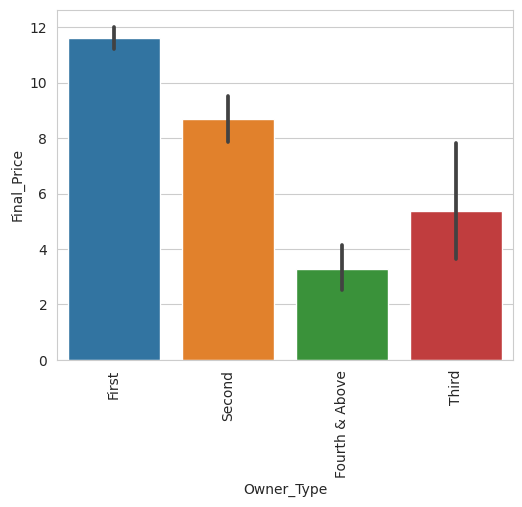

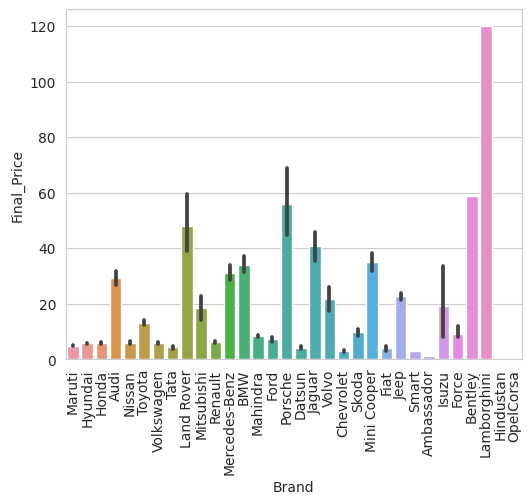

In [44]:
for i in range(len(cat_cols)):
    plt.figure(figsize=(20, 10))
    plt.subplot(2,3,i+1)
    sns.barplot(y=my_data['Final_Price'], x=my_data[cat_cols[i]], data=my_data)
    plt.xticks(rotation=90)
    plt.show()

<Axes: >

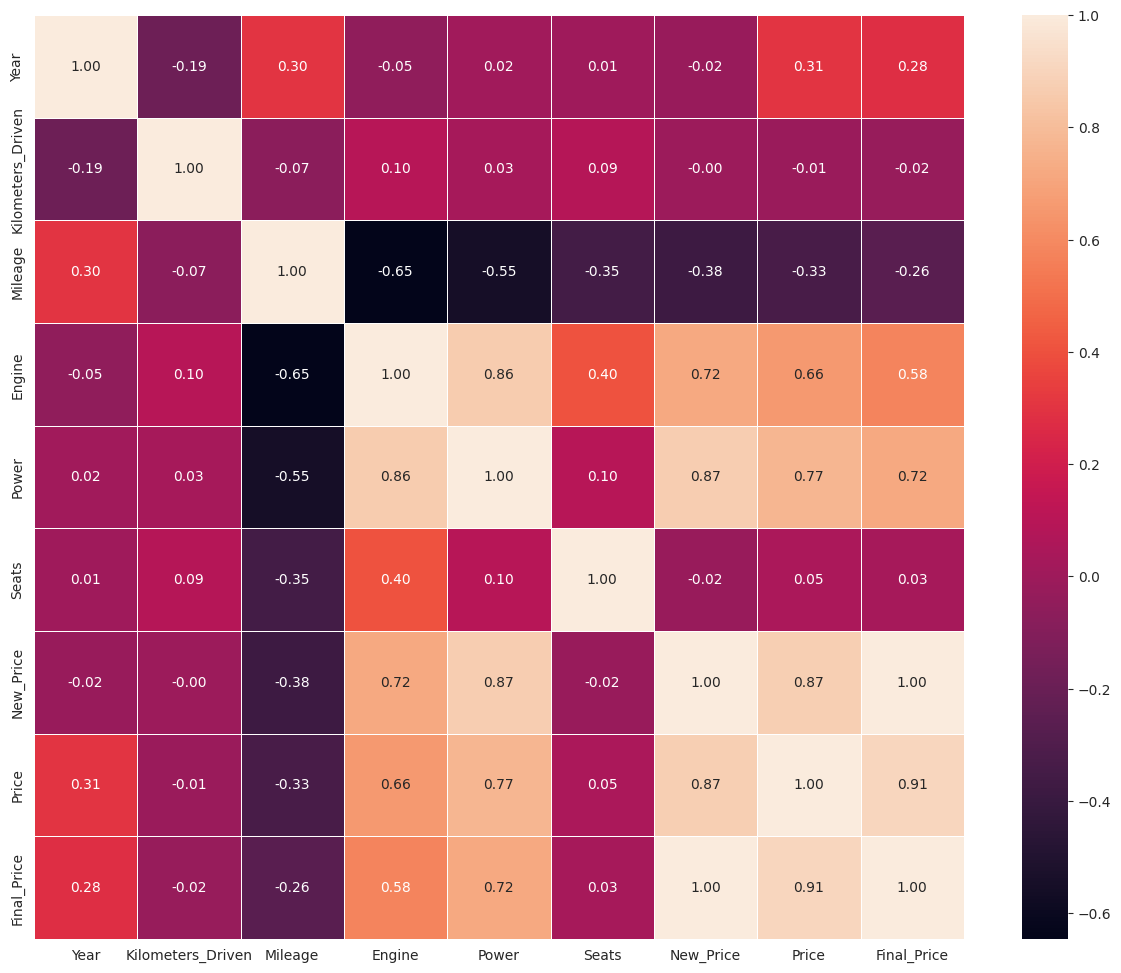

In [45]:
corr = my_data[numric_cols].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,fmt=".2f",linewidth=.5)

In [46]:
# lets handle missing Values for our input data (mean except Final_Price ,will handle it further)
my_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
Brand                   0
Model                   1
Final_Price          1052
dtype: int64

In [47]:
missing_values = ['Mileage','Engine','Power','Seats']

In [48]:
my_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Final_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,WagonR,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta1.6,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,JazzV,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4New,17.74


In [49]:
my_data.Seats.value_counts()

Seats
5.0     6045
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64

In [50]:
my_data['Engine']=my_data.groupby(['Name','Year'])['Engine'].transform(lambda x:x.fillna(x.median()))
my_data['Engine']=my_data.groupby(['Brand','Model'])['Engine'].transform(lambda x:x.fillna(x.median()))

my_data['Power']=my_data.groupby(['Name','Year'])['Power'].transform(lambda x:x.fillna(x.median()))
my_data['Power']=my_data.groupby(['Brand','Model'])['Power'].transform(lambda x:x.fillna(x.median()))

my_data['Mileage']=my_data.groupby(['Name','Year'])['Mileage'].transform(lambda x:x.fillna(x.median()))
my_data['Mileage']=my_data.groupby(['Brand','Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))

my_data['Seats'] = my_data.groupby(['Brand','Model'])['Seats'].transform(lambda x:x.fillna(x.median()))

In [51]:
my_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                33
Engine                 19
Power                  64
Seats                  24
New_Price            6246
Price                1233
Brand                   0
Model                   1
Final_Price          1052
dtype: int64

<Axes: >

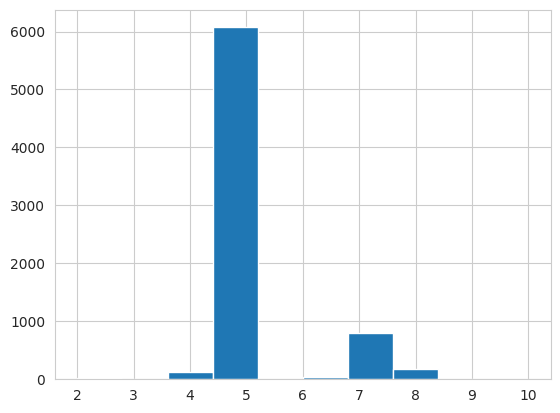

In [52]:
my_data['Seats'].hist() # as we can see almost seats are =  5 , and represent mode of our data

In [53]:
#we almost handled most of null values , lets fill the rest of them by median 
na_val = ['Seats','Mileage','Engine','Power']
def fil_na_values(my_data,na_val):
    for i in na_val:
        if i == 'Seats':
            my_data[i].fillna(my_data[i].value_counts().index[0],inplace = True) #most frequent value
        else:
            my_data[i].fillna(my_data[i].median(),inplace = True)
        
fil_na_values(my_data,na_val)

In [54]:
my_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
Brand                   0
Model                   1
Final_Price          1052
dtype: int64

In [55]:
my_data['Final_Price']=my_data.groupby(['Power','Engine'])['Final_Price'].transform(lambda x:x.fillna(x.fillna(x.median())))
my_data['Final_Price']=my_data.groupby(['Name'])['Final_Price'].transform(lambda x:x.fillna(x.fillna(x.median())))
my_data['Final_Price']=my_data.groupby(['Year','Name'])['Final_Price'].transform(lambda x:x.fillna(x.fillna(x.median())))
my_data['Final_Price']=my_data.groupby(['Brand'])['Final_Price'].transform(lambda x:x.fillna(x.fillna(x.median())))

In [56]:
my_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
Brand                   0
Model                   1
Final_Price             1
dtype: int64

In [57]:
my_data.drop(['New_Price','Price'],axis = 1,inplace=True)
my_data.dropna(axis = 0 , inplace = True)

In [58]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7249 non-null   object 
 1   Location           7249 non-null   object 
 2   Year               7249 non-null   int64  
 3   Kilometers_Driven  7249 non-null   int64  
 4   Fuel_Type          7249 non-null   object 
 5   Transmission       7249 non-null   object 
 6   Owner_Type         7249 non-null   object 
 7   Mileage            7249 non-null   float64
 8   Engine             7249 non-null   float64
 9   Power              7249 non-null   float64
 10  Seats              7249 non-null   float64
 11  Brand              7249 non-null   object 
 12  Model              7249 non-null   object 
 13  Final_Price        7249 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 849.5+ KB


<Axes: xlabel='Final_Price', ylabel='Density'>

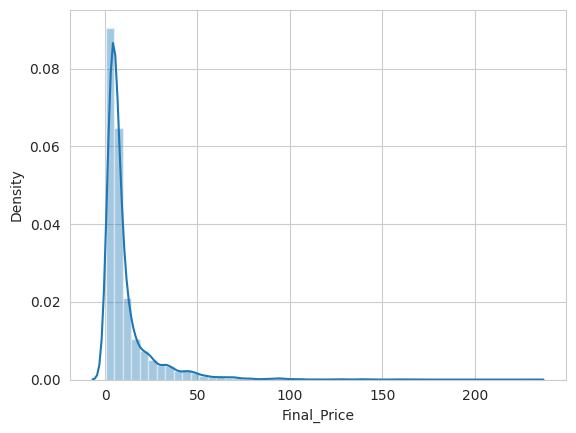

In [59]:
sns.distplot(my_data['Final_Price'])

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

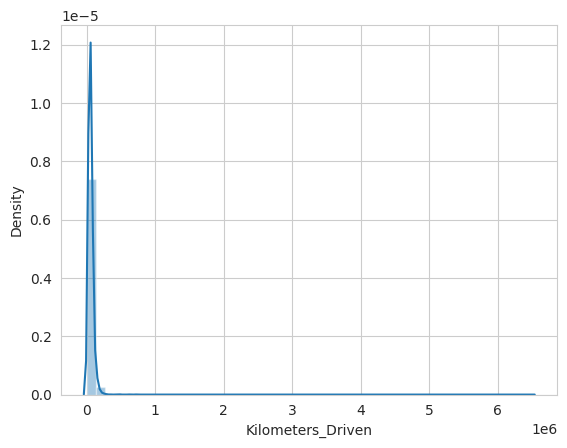

In [60]:
sns.distplot(my_data['Kilometers_Driven'])

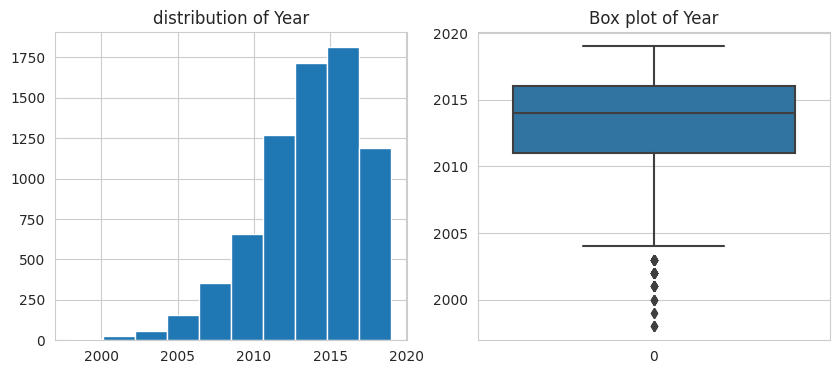

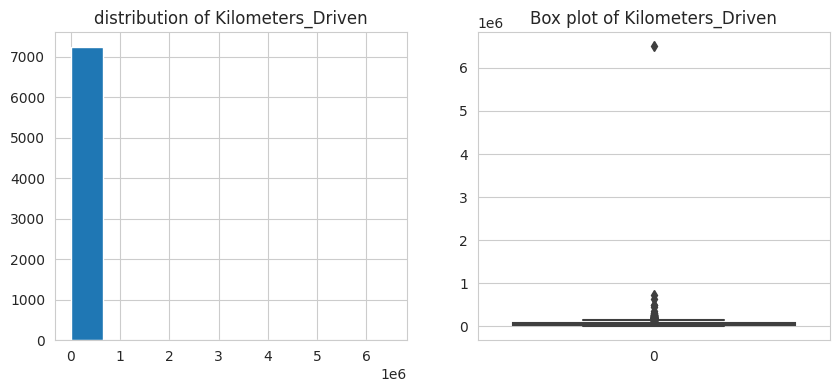

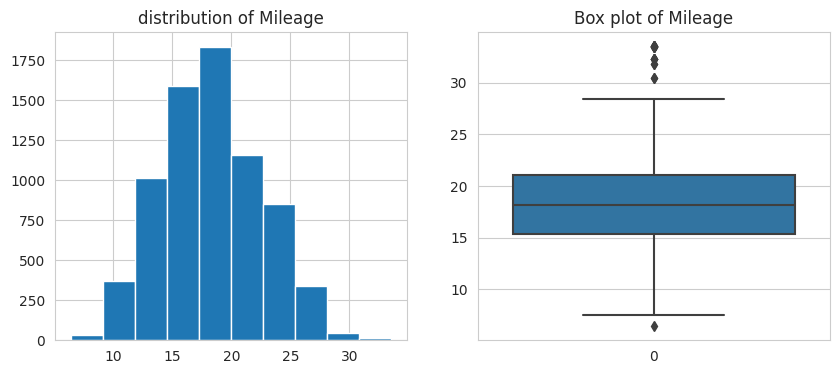

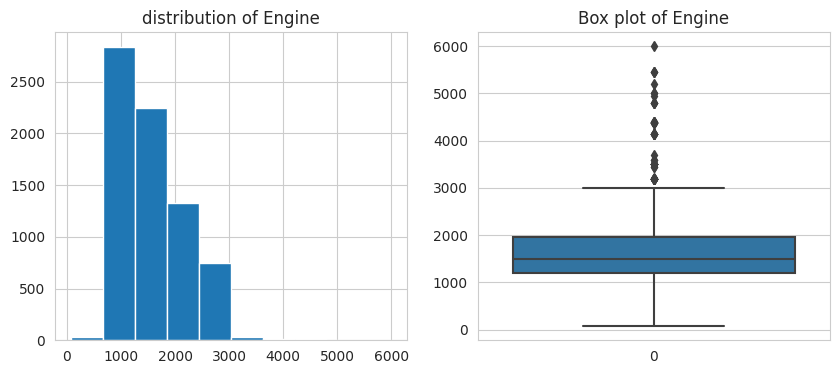

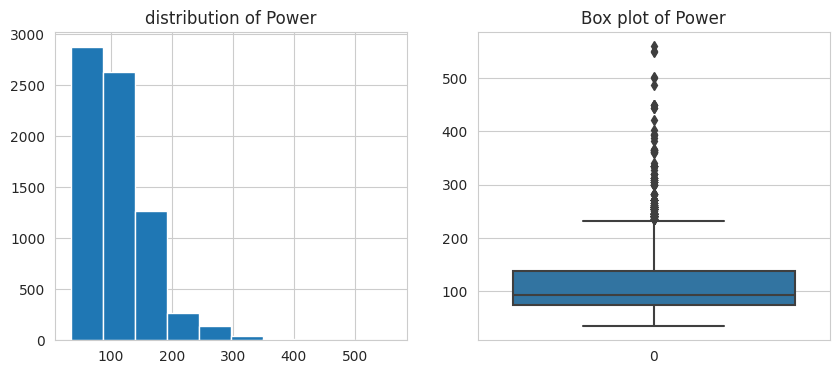

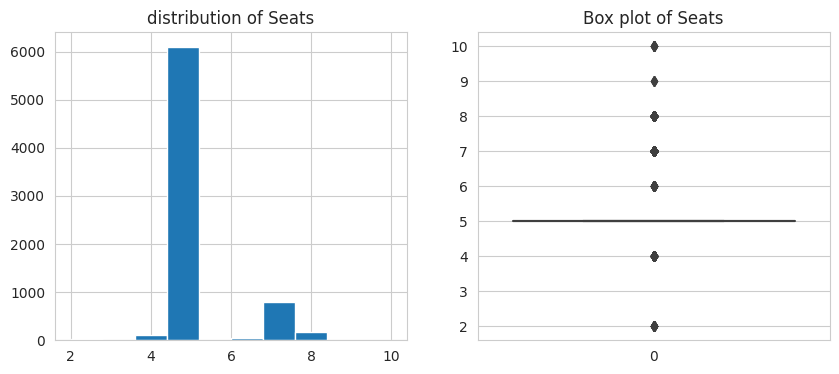

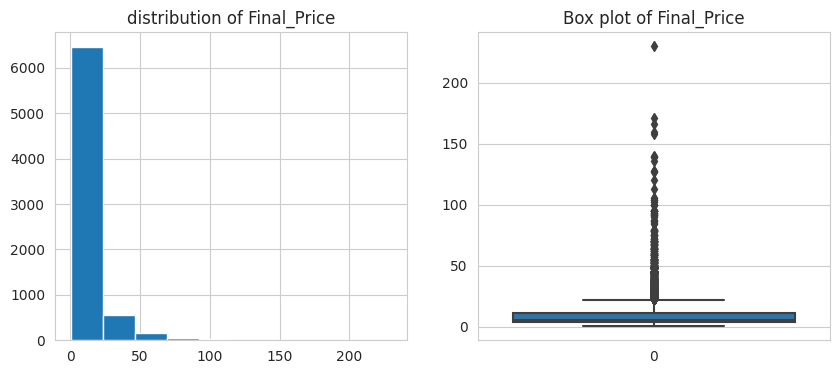

In [61]:
numric_cols2= ['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Final_Price']
for column in numric_cols2:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    my_data[column].hist(figsize=(10, 4))
    plt.title(f"distribution of {column}")

    plt.subplot(1,2,2)
    sns.set_style("whitegrid")
    sns.boxplot(my_data[column])
    plt.title(f"Box plot of {column}")


<Axes: >

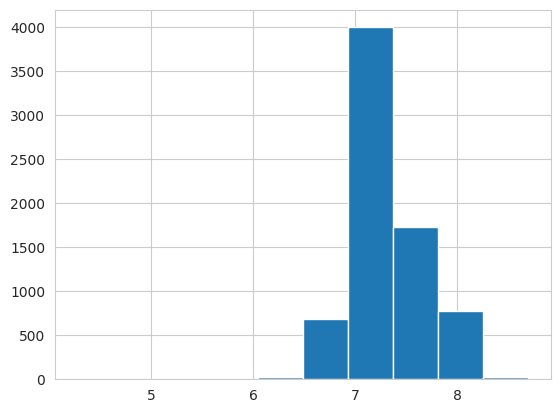

In [62]:
np.log(my_data['Engine']).hist()

Text(0.5, 1.0, 'Sqrt transformation')

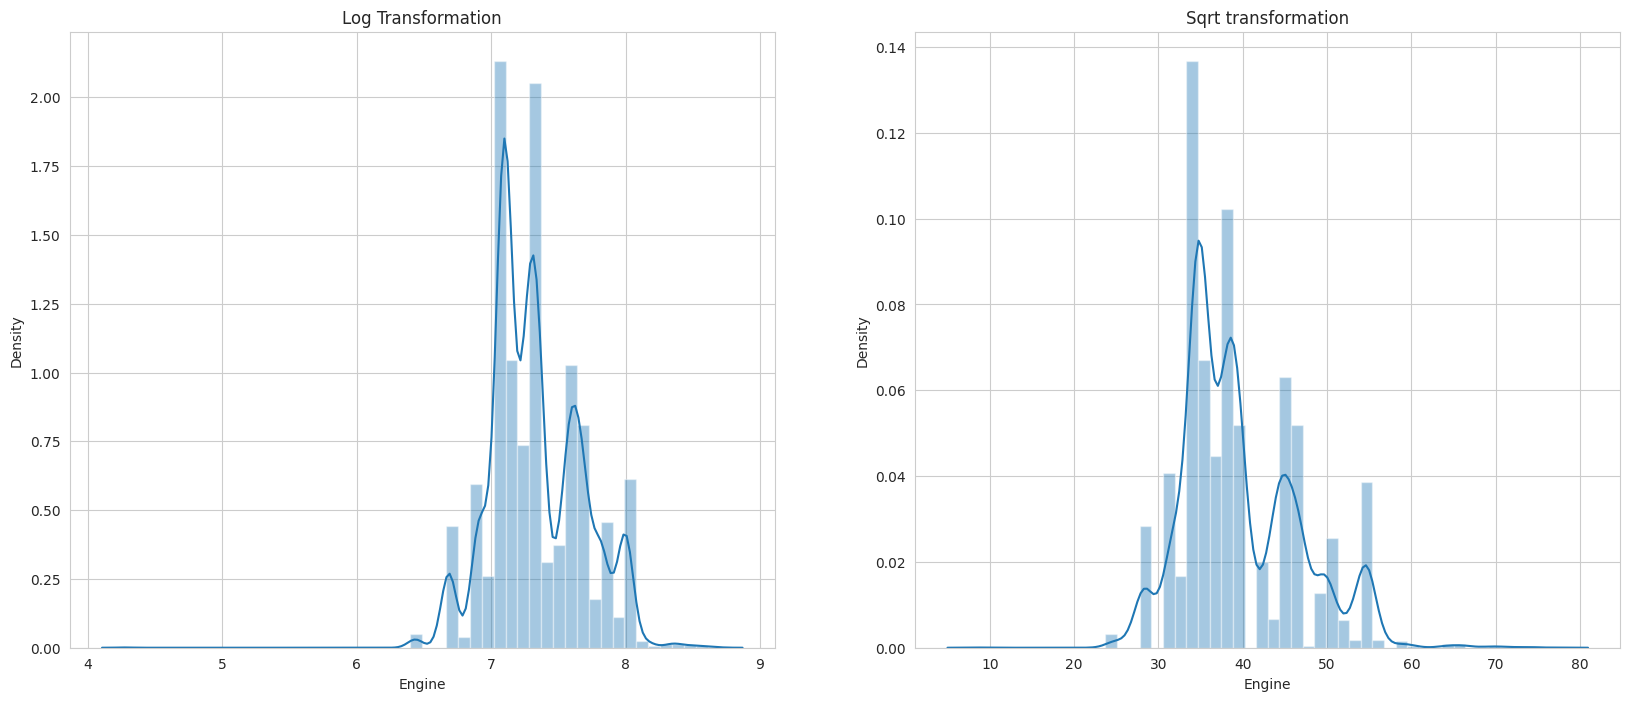

In [63]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(np.log(my_data['Engine']),kde=True)
plt.title('Log Transformation')
plt.subplot(1,2,2)
sns.distplot(np.sqrt(my_data['Engine']))
plt.title('Sqrt transformation')


In [64]:
log_cols = ['Engine','Power','Kilometers_Driven','Final_Price']
def log_transformation(data,log_cols):
    for i in log_cols:
        if (data[i] == 1.0).all():
            data[i + '_log'] = np.log(data[io]+1)
        else:
            data[i + '_log'] = np.log(data[i])
    data.info()
log_transformation(my_data,log_cols)

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7249 non-null   object 
 1   Location               7249 non-null   object 
 2   Year                   7249 non-null   int64  
 3   Kilometers_Driven      7249 non-null   int64  
 4   Fuel_Type              7249 non-null   object 
 5   Transmission           7249 non-null   object 
 6   Owner_Type             7249 non-null   object 
 7   Mileage                7249 non-null   float64
 8   Engine                 7249 non-null   float64
 9   Power                  7249 non-null   float64
 10  Seats                  7249 non-null   float64
 11  Brand                  7249 non-null   object 
 12  Model                  7249 non-null   object 
 13  Final_Price            7249 non-null   float64
 14  Engine_log             7249 non-null   float64
 15  Power_log

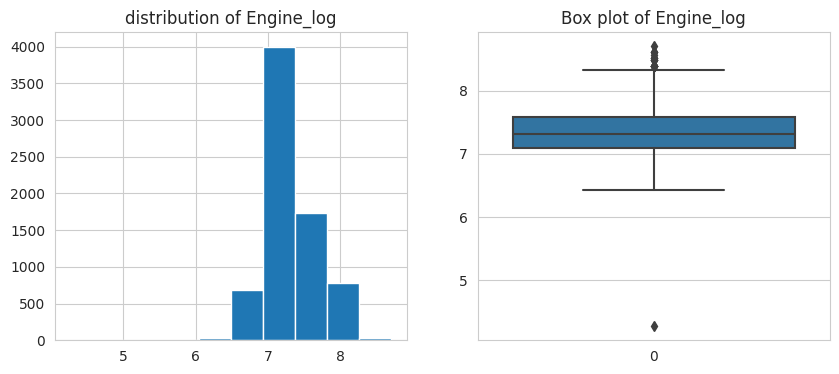

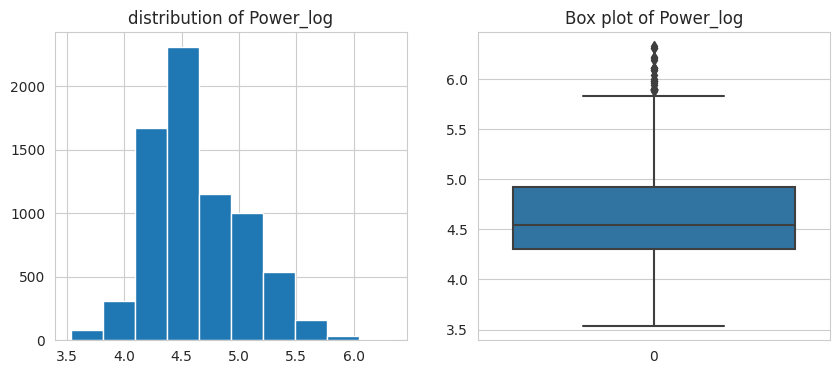

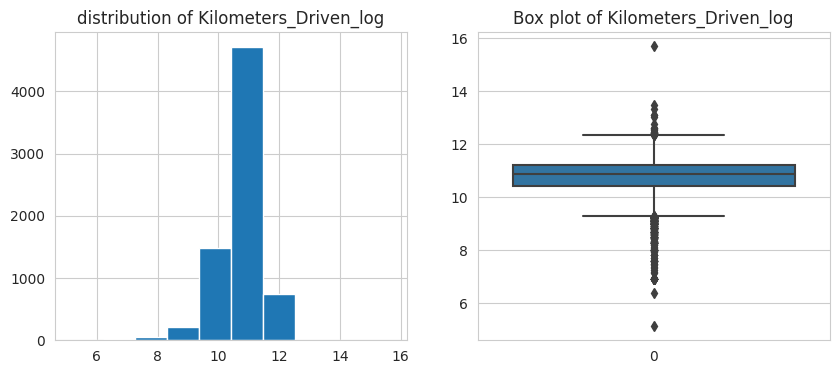

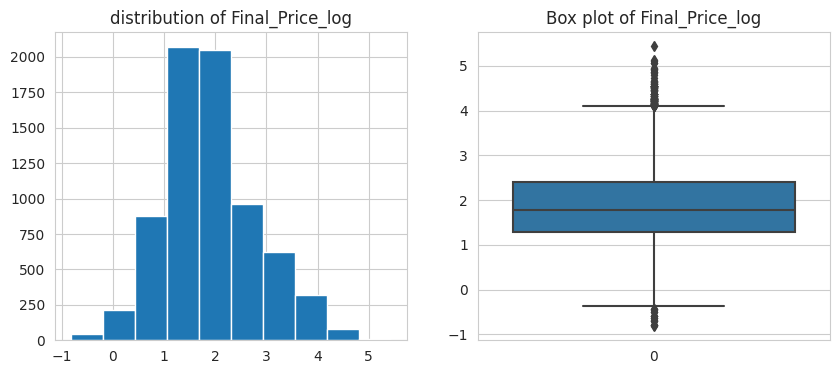

In [65]:
numeric_log_cols = ['Engine_log','Power_log','Kilometers_Driven_log','Final_Price_log']
for column in numeric_log_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    my_data[column].hist(figsize=(10, 4))
    plt.title(f"distribution of {column}")

    plt.subplot(1,2,2)
    sns.set_style("whitegrid")
    sns.boxplot(my_data[column])
    plt.title(f"Box plot of {column}")

transformed data sems better :)

In [66]:
df = my_data

In [67]:
df.drop(['Engine','Seats','Name','Model','Brand','Power','Kilometers_Driven','Final_Price'],axis=1,inplace=True)

In [68]:
X = df.drop(["Final_Price_log"], axis=1)
y = df["Final_Price_log"]

In [69]:
X= pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)

In [70]:
X.head()

,Year,Mileage,Engine_log,Power_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,6.905753,4.063198,11.184421,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,2015,19.67,7.366445,4.837868,10.621327,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,2011,18.20,7.089243,4.485260,10.736397,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,2012,20.77,7.129298,4.485936,11.373663,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,2013,15.20,7.584773,4.947340,10.613246,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing , svm

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import r2_score
print(f'r2_score = {r2_score(y_test,y_pred)}')

r2_score = 0.8438089665684168


In [73]:

MAE = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
MSE = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
RMSE = math.sqrt(MSE)
print(f'MAE = {MAE}')
print('--'*50)
print(f'MSE = {MSE}')
print('--'*50)
print(f'RMSE = {RMSE}')



MAE = 0.25965272526195987
----------------------------------------------------------------------------------------------------
MSE = 0.12685780493830318
----------------------------------------------------------------------------------------------------
RMSE = 0.35617103326674837
